<a href="https://colab.research.google.com/github/Daniel2601/ML7/blob/master/Copy_of_import_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gzip
import numpy as np
import os
import matplotlib.pyplot as plt


In [0]:
!git clone https://github.com/Daniel2601/ML7

Cloning into 'ML7'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [0]:
# Load the dataset t10k-images-idx3-ubyte.gz
filename="ML7/t10k-images-idx3-ubyte.gz"
target_url="https://daniel2601.github.io/ML7/t10k-images-idx3-ubyte.gz"
IMAGE_SIZE = 28
NUM_CHANNELS = 1
PIXEL_DEPTH = 255
num_images=50*50

In [0]:

def extract_data(filename, num_images):
  """Extract the images into a 4D tensor [image index, y, x, channels].
  Values are rescaled from [0, 255] down to [-0.5, 0.5].
  """
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(16)
    buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images * NUM_CHANNELS)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = (data - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
    data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS)
    return data


mydata=extract_data(filename, num_images)

def makeMontage(mydata, width=30, height=20):
    imagei = mydata[0,:,:,0]
    for i in range(height):
        imagei=np.r_[imagei,mydata[i,:,:,0]]
        
    image=imagei
    
    for j in range(width):
        imagei = mydata[j*width,:,:,0]
        for i in range(height):
            imagei=np.r_[imagei,mydata[i+width*j,:,:,0]]
        image=np.c_[image,imagei]
    
    return(image)



Extracting ML7/t10k-images-idx3-ubyte.gz


In [0]:

image=makeMontage(mydata, width=10, height=10)



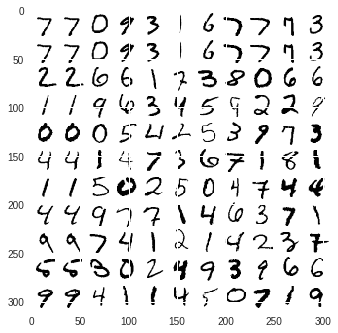

In [0]:
#plt.gray()
plt.imshow(image)